In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
test_df = pd.read_csv('test.csv')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# discription of object type features
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Clark, Mr. Walter Miller",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### we perform operations on both training and testing datasets together to stay consistent.

In [10]:
print('Before deleting shape : ', test_df.shape)

Before deleting shape :  (418, 11)


In [11]:
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [12]:
print('After deleting shape : ', test_df.shape)

After deleting shape :  (418, 9)


In [13]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [14]:
test_df['Name'].head()

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

In [15]:
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.')

In [16]:
pd.crosstab(test_df['Title'],test_df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [17]:
test_df['Title'] = test_df['Title'].replace(['Ms'], 'Miss')
test_df['Title'] = test_df['Title'].replace(['Col', 'Dona', 'Dr', 'Rev'], 'Rare')

In [18]:
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

### Title mapping

In [19]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}

In [20]:
test_df['Title'] = test_df['Title'].map(title_mapping)

In [21]:
test_df['Title'].isnull().sum()

0

In [22]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


In [23]:
test_df.drop(['Name'], axis=1, inplace=True)

In [24]:
test_df.shape

(418, 9)

In [25]:
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1}).astype(int)

In [26]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


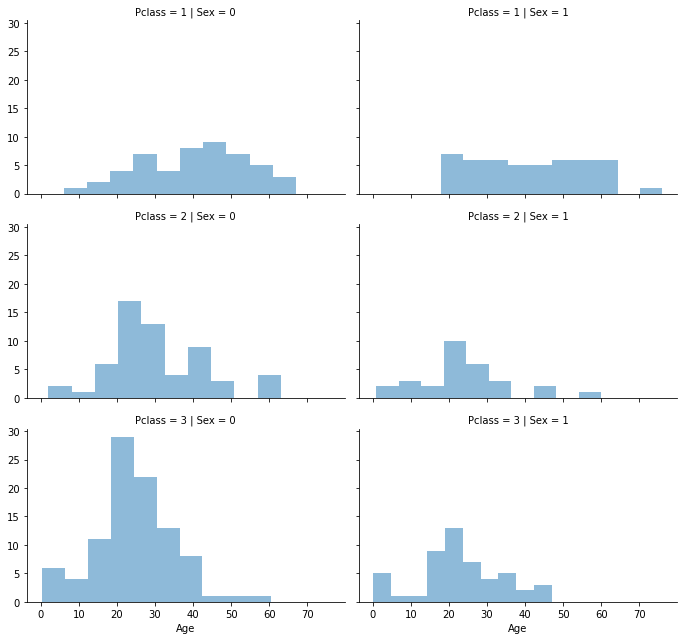

In [27]:
grid = sns.FacetGrid(test_df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5)

In [28]:
ages = np.zeros((2,3))
ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [29]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title            int64
dtype: object

In [30]:
for i in range(2):
    for j in range(3):
        age = test_df['Age'].dropna()
        guess = age.median()
        ages[i, j ] = int(guess / 0.5 + 0.5) * 0.5
        
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


In [31]:
test_df['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [32]:
test_df['Age'].isnull().sum()

86

In [33]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [34]:
test_df['Age'].isnull().sum()

0

In [35]:
test_df['Age'] = test_df['Age'].astype(int)

In [36]:
test_df['Age']

0      34
1      47
2      62
3      27
4      22
       ..
413    27
414    39
415    38
416    27
417    27
Name: Age, Length: 418, dtype: int32

In [37]:
test_df['AgeBand'] = pd.cut(test_df['Age'], 5)
test_df[['AgeBand', 'Age']]

,AgeBand,Age
0,"(30.4, 45.6]",34
1,"(45.6, 60.8]",47
2,"(60.8, 76.0]",62
3,"(15.2, 30.4]",27
4,"(15.2, 30.4]",22
...,...,...
413,"(15.2, 30.4]",27
414,"(30.4, 45.6]",39
415,"(30.4, 45.6]",38
416,"(15.2, 30.4]",27


In [38]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']+1

In [39]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'AgeBand', 'FamilySize'],
      dtype='object')

In [40]:
test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize']==1, 'IsAlone'] = 1
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone
0,892,3,0,34,0,0,7.8292,Q,1,"(30.4, 45.6]",1,1
1,893,3,1,47,1,0,7.0000,S,3,"(45.6, 60.8]",2,0
2,894,2,0,62,0,0,9.6875,Q,1,"(60.8, 76.0]",1,1
3,895,3,0,27,0,0,8.6625,S,1,"(15.2, 30.4]",1,1
4,896,3,1,22,1,1,12.2875,S,3,"(15.2, 30.4]",3,0


In [41]:
test_df = test_df.drop(['SibSp', 'Parch', 'FamilySize', 'AgeBand'], axis=1)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,34,7.8292,Q,1,1
1,893,3,1,47,7.0000,S,3,0
2,894,2,0,62,9.6875,Q,1,1
3,895,3,0,27,8.6625,S,1,1
4,896,3,1,22,12.2875,S,3,0


In [42]:
test_df['Embarked'].isnull().sum()

0

In [43]:
test_df['Fare'].isna().sum()

1

In [44]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,34,7.8292,Q,1,1
1,893,3,1,47,7.0000,S,3,0
2,894,2,0,62,9.6875,Q,1,1
3,895,3,0,27,8.6625,S,1,1
4,896,3,1,22,12.2875,S,3,0


In [45]:
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'Q':1, 'C':2}).astype(int)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,34,7.8292,1,1,1
1,893,3,1,47,7.0000,0,3,0
2,894,2,0,62,9.6875,1,1,1
3,895,3,0,27,8.6625,0,1,1
4,896,3,1,22,12.2875,0,3,0


In [46]:
test_df['Fare'].isna().sum()

0

In [48]:
test_df['FareBand'] = pd.qcut(test_df['Fare'], 4)

In [49]:
test_df['FareBand']

0        (-0.001, 7.896]
1        (-0.001, 7.896]
2        (7.896, 14.454]
3        (7.896, 14.454]
4        (7.896, 14.454]
             ...        
413      (7.896, 14.454]
414    (31.472, 512.329]
415      (-0.001, 7.896]
416      (7.896, 14.454]
417     (14.454, 31.472]
Name: FareBand, Length: 418, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.472] < (31.472, 512.329]]

In [50]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,892,3,0,34,7.8292,1,1,1,"(-0.001, 7.896]"
1,893,3,1,47,7.0000,0,3,0,"(-0.001, 7.896]"
2,894,2,0,62,9.6875,1,1,1,"(7.896, 14.454]"
3,895,3,0,27,8.6625,0,1,1,"(7.896, 14.454]"
4,896,3,1,22,12.2875,0,3,0,"(7.896, 14.454]"


In [51]:
test_df.loc[ test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare']   = 2
test_df.loc[ test_df['Fare'] > 31, 'Fare'] = 3
test_df['Fare'] = test_df['Fare'].astype(int)

In [53]:
test_df.head(15)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,892,3,0,34,0,1,1,1,"(-0.001, 7.896]"
1,893,3,1,47,0,0,3,0,"(-0.001, 7.896]"
2,894,2,0,62,1,1,1,1,"(7.896, 14.454]"
3,895,3,0,27,1,0,1,1,"(7.896, 14.454]"
4,896,3,1,22,1,0,3,0,"(7.896, 14.454]"
5,897,3,0,14,1,0,1,1,"(7.896, 14.454]"
6,898,3,1,30,0,1,2,1,"(-0.001, 7.896]"
7,899,2,0,26,2,0,1,0,"(14.454, 31.472]"
8,900,3,1,18,0,2,3,1,"(-0.001, 7.896]"
9,901,3,0,21,2,0,1,0,"(14.454, 31.472]"


In [54]:
X_test = test_df.drop('PassengerId', axis=1)

In [55]:
X_test.shape

(418, 8)

In [56]:
test_df.dtypes

PassengerId       int64
Pclass            int64
Sex               int32
Age               int32
Fare              int32
Embarked          int32
Title             int64
IsAlone           int64
FareBand       category
dtype: object

In [57]:
test_df.drop('PassengerId', axis=1, inplace=True)

In [58]:
test_df.shape

(418, 8)

In [59]:
test_df.dtypes

Pclass         int64
Sex            int32
Age            int32
Fare           int32
Embarked       int32
Title          int64
IsAlone        int64
FareBand    category
dtype: object

In [60]:
test_df.drop('FareBand', axis=1, inplace=True)

In [61]:
test_df.dtypes

Pclass      int64
Sex         int32
Age         int32
Fare        int32
Embarked    int32
Title       int64
IsAlone     int64
dtype: object

In [63]:
X_test.drop('FareBand', axis=1, inplace=True)

In [64]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,34,0,1,1,1
1,3,1,47,0,0,3,0
2,2,0,62,1,1,1,1
3,3,0,27,1,0,1,1
4,3,1,22,1,0,3,0
...,...,...,...,...,...,...,...
413,3,0,27,1,0,1,1
414,1,1,39,3,2,5,1
415,3,0,38,0,0,1,1
416,3,0,27,1,0,1,1


## Logistic Regression